# VGG Net 응용

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [2]:
vgg16 = VGG16()
vgg16.summary()

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [7]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg19 = VGG19()
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
import numpy as np
from PIL import Image
from google.colab import files
up = files.upload()

Saving cat3.jpg to cat3.jpg


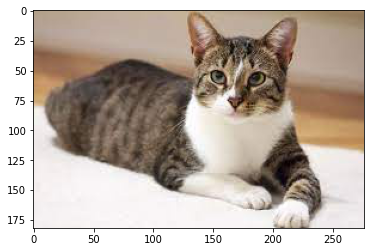

In [11]:
import matplotlib.pyplot as plt

img = Image.open('cat3.jpg')
plt.imshow(img);

In [13]:
img = np.array(img.resize((224, 224,)))
img.shape

(224, 224, 3)

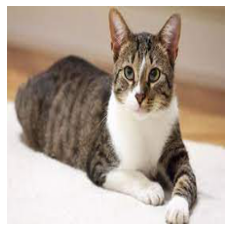

In [14]:
plt.imshow(img), plt.axis('off');

## 이미지 예측

In [ ]:
# vgg16.predict(np.array(img).reshape(-1, 224, 224, 3))
yhat = vgg16.predict(img.reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
yhat, label

In [23]:
yhat.shape, label

((1, 1000),
 [[('n02124075', 'Egyptian_cat', 0.58085394),
   ('n02123045', 'tabby', 0.33690035),
   ('n02123159', 'tiger_cat', 0.080482274),
   ('n02127052', 'lynx', 0.00047275427),
   ('n04040759', 'radiator', 0.00023365744)]])

In [26]:
label = label[0][0]
print(f'예측: {label[1]} ({label[2]*100:.2f}%)')

예측: tabby (72.67%)


In [25]:
yhat = vgg19.predict(img.reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

('tabby', 0.7266756)

## 이미지를 224 x 224 사이즈로 자르기

In [36]:
img = Image.open('cat3.jpg')
h, w, _ = np.array(img).shape
h, w

(182, 277)

In [37]:
if h > w:
    width, height = 224, (h * 224) // w
else:
    width, height = (w * 224) // h, 224
height, width

(224, 340)

In [38]:
new_img = np.array(img.resize((width, height)))
new_img.shape

(224, 340, 3)

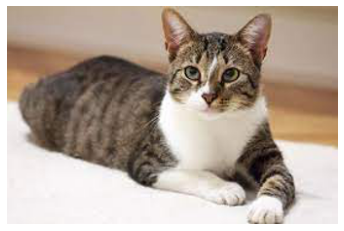

In [39]:
plt.imshow(new_img), plt.axis('off');

In [42]:
diff = abs(width - height) // 2
if width > height:
    final_img = new_img[:, diff:diff+224, :]
else:
    final_img = new_img[diff:diff+224, :, :]
final_img.shape

(224, 224, 3)

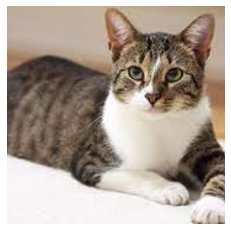

In [43]:
plt.imshow(final_img), plt.axis('off');

In [54]:
IMAGE_SIZE = 224

def center_image(img):
    h, w, _ = np.array(img).shape
    if h > w:
            width, height = IMAGE_SIZE, (h * IMAGE_SIZE) // w
    else:
            width, height = (w * IMAGE_SIZE) // h, IMAGE_SIZE
   
    new_img = np.array(img.resize((width, height)))
    
    diff = abs(width - height) // 2
    if width > height:
            final_img = new_img[:, diff:diff+IMAGE_SIZE, :]
    else:
            final_img = new_img[diff:diff+IMAGE_SIZE, :, :]
            
    return final_img

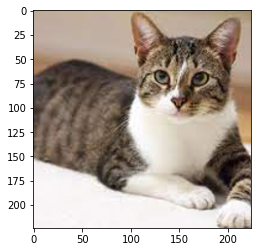

In [55]:
img = Image.open('cat3.jpg')
img2 = center_image(img)
plt.imshow(img2)

In [53]:
yhat = vgg16.predict(img2.reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

('tabby', 0.5744169)